## Importing Libraries required

In [1]:
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Datasets

In [2]:
train = pd.read_csv('../datasets/train_cab.csv')

In [3]:
test = pd.read_csv('../datasets/test.csv')

In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


# Preprocessing Dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [7]:
from pprint import pprint

In [8]:
pprint(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB
None


`Missing Values` --> fare_amount, passenger_count <br>
`Type Casting`   --> fare_amount, pickup_datetime

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


`Type Casting`   --> fare_amount, pickup_datetime

## Dealing with missing values in Train set

In [10]:
train.fare_amount.isnull().sum()

24

As fare_amount would be the target variable, it's always better to remove those missing rows.

In [11]:
train.dropna(subset=['fare_amount'], inplace=True)

In [12]:
train.fare_amount.isnull().sum()

0

In [13]:
train.passenger_count.isnull().sum()

55

In [14]:
55/(len(train))*100

0.34282864800847723

<b>The missing values in passenger count is less than 0.5 percent. So dropping the values</b>

In [15]:
train.dropna(subset=['passenger_count'], inplace=True)

In [16]:
train.shape

(15988, 7)

* All missing values are handled

## Handling Type Conversion in both training and testing data

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15988 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15988 non-null  object 
 1   pickup_datetime    15988 non-null  object 
 2   pickup_longitude   15988 non-null  float64
 3   pickup_latitude    15988 non-null  float64
 4   dropoff_longitude  15988 non-null  float64
 5   dropoff_latitude   15988 non-null  float64
 6   passenger_count    15988 non-null  float64
dtypes: float64(5), object(2)
memory usage: 999.2+ KB


In [18]:
#train.fare_amount.astype(float) # Throws an error ValueError: could not convert string to float: '430-'

In [19]:
train[train.fare_amount == '430-']

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1123,430-,2009-09-22 19:01:01 UTC,-73.97961,40.771326,-73.975764,40.781965,1.0


In [20]:
train = train[~(train.fare_amount == '430-')]

In [21]:
train.shape

(15987, 7)

In [22]:
train.pickup_datetime[1327]

'43'

In [23]:
train.drop(1327,inplace=True)

In [24]:
train.fare_amount = train.fare_amount.astype(float)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 0 to 16065
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        15986 non-null  float64
 1   pickup_datetime    15986 non-null  object 
 2   pickup_longitude   15986 non-null  float64
 3   pickup_latitude    15986 non-null  float64
 4   dropoff_longitude  15986 non-null  float64
 5   dropoff_latitude   15986 non-null  float64
 6   passenger_count    15986 non-null  float64
dtypes: float64(6), object(1)
memory usage: 999.1+ KB


## Feature Engineering for both training and testing data

In [26]:
def split_dates(df):
    df.pickup_datetime = df.pickup_datetime.apply(lambda x: x[:-3])
    df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
    df['Year'] = df.pickup_datetime.dt.year
    df['Month'] = df.pickup_datetime.dt.month
    df['Day'] = df.pickup_datetime.dt.day
    df['Hour'] = df.pickup_datetime.dt.hour
    df['Minutes'] = df.pickup_datetime.dt.minute
    df.drop('pickup_datetime', axis=1, inplace=True)

    return df

In [27]:
train = split_dates(train)

In [28]:
test = split_dates(test)

In [29]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,17,26
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,16,52
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,0,35
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,4,30
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,7,51


In [30]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hour,Minutes
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,8
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,8
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,53
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,12
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,12


In [31]:
train.reset_index(drop=True, inplace=True)

In [32]:
test.reset_index(drop=True, inplace=True)

In [33]:
import haversine

In [34]:
out = []
for i,j,k,l in zip(*(train.pickup_latitude, train.pickup_longitude, train.dropoff_latitude, train.dropoff_longitude)):
    out.append(haversine.haversine((i,j),(k,l)))

train['distance'] = pd.Series(out)

train.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

In [35]:
out = []
for i,j,k,l in zip(*(test.pickup_latitude, test.pickup_longitude, test.dropoff_latitude, test.dropoff_longitude)):
    out.append(haversine.haversine((i,j),(k,l)))

test['distance'] = pd.Series(out)

test.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

In [36]:
train.head()

,fare_amount,passenger_count,Year,Month,Day,Hour,Minutes,distance
0,4.5,1.0,2009,6,15,17,26,1.030765
1,16.9,1.0,2010,1,5,16,52,8.450145
2,5.7,2.0,2011,8,18,0,35,1.389527
3,7.7,1.0,2012,4,21,4,30,2.799274
4,5.3,1.0,2010,3,9,7,51,1.999160


In [37]:
test.head()

,passenger_count,Year,Month,Day,Hour,Minutes,distance
0,1,2015,1,27,13,8,2.323263
1,1,2015,1,27,13,8,2.425356
2,1,2011,10,8,11,53,0.618629
3,1,2012,12,1,21,12,1.961035
4,1,2012,12,1,21,12,5.387309


# Sanity Check

Sanity checks to be performed<br>

- fare amount should not be less than or equal to zero
- We also have to convert the distance of the ride using pickup and dropoff coordinates
- Then we have to check for the distances less than or equal to 0
- Check Passenger count, which should be integer and less than or equal to 6 and greater than 0

In [38]:
train[train.fare_amount<=0]

,fare_amount,passenger_count,Year,Month,Day,Hour,Minutes,distance
1976,-2.9,1.0,2010,3,9,23,37,0.184225
2418,-2.5,1.0,2015,3,22,5,14,0.021244
9922,0.0,1.0,2010,2,15,14,26,3.184767
12952,-3.0,4.0,2013,8,30,8,57,0.096377


In [39]:
train = train[train.fare_amount>0]

In [40]:
train[train.distance <= 0]

,fare_amount,passenger_count,Year,Month,Day,Hour,Minutes,distance
10,5.5,3.0,2012,12,24,11,24,0.0
14,5.0,1.0,2013,11,23,12,57,0.0
98,52.0,1.0,2009,3,25,0,8,0.0
116,8.0,2.0,2013,1,17,17,22,0.0
178,6.5,1.0,2014,1,8,21,55,0.0
...,...,...,...,...,...,...,...,...
15849,10.9,5.0,2010,5,18,20,34,0.0
15857,3.3,3.0,2009,10,1,20,32,0.0
15934,10.9,2.0,2011,3,4,14,5,0.0
15942,5.5,6.0,2013,4,10,12,24,0.0


In [41]:
train = train[~(train.distance <= 0)]

In [42]:
test = test[~(test.distance <= 0)]

In [43]:
train = train[train.passenger_count > 0]

In [44]:
train = train[train.passenger_count<=6]

In [45]:
train.shape

(15452, 8)

In [46]:
train.passenger_count.value_counts()

1.00    10902
2.00     2263
5.00     1018
3.00      656
4.00      317
6.00      294
1.30        1
0.12        1
Name: passenger_count, dtype: int64

In [47]:
train = train[~(train.passenger_count.isin([0.12,1.3]))]

In [48]:
train.passenger_count = train.passenger_count.astype(int)

In [49]:
train.reset_index(drop=True, inplace=True)


In [50]:
test.reset_index(drop=True, inplace=True)

# outlier check

In [51]:
import seaborn as sns
from scipy.stats import probplot

In [52]:
def outlier_check_graphs(df, column):
    plt.figure(figsize=[20,6])
    plt.subplot(1,3,1)
    sns.distplot(df[column])
    
    plt.subplot(1,3,2)
    probplot(df[column], dist='norm', plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[column])
    plt.show()
    

In [53]:
train.fare_amount.describe()

count    15450.000000
mean        15.173824
std        438.622505
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

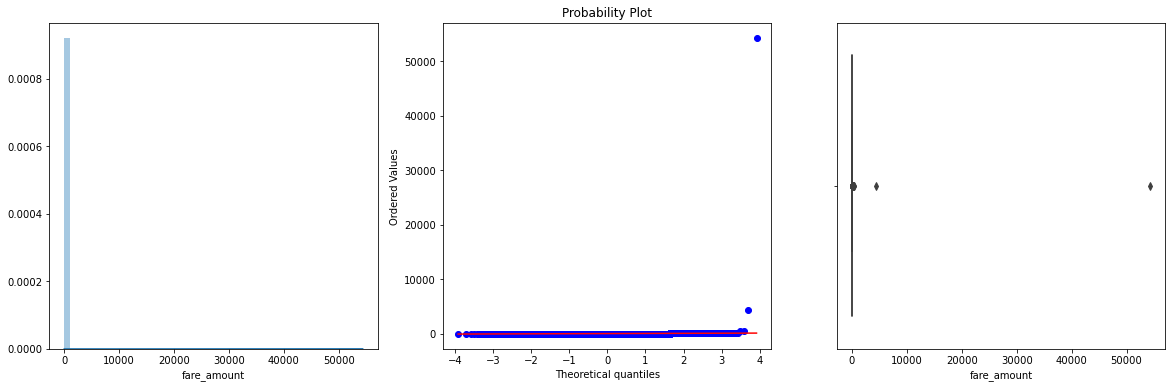

In [54]:
outlier_check_graphs(train, 'fare_amount')

In [55]:
def find_limits(df, column):
    q25 = df[column].quantile(0.25)
    q75 = df[column].quantile(0.75)
    IQR = q75 - q25
    
    lower_limit =  q25 - (IQR * 1.5)
    upper_limit = q75 + (IQR * 1.5)
    return lower_limit, upper_limit

In [56]:
fare_lower, fare_upper = find_limits(train, 'fare_amount')

In [57]:
fare_upper

22.25

In [58]:
fare_lower

-3.75

In [59]:
from numpy import where

In [60]:
train['fare_amount']= where(train['fare_amount'] > fare_upper, fare_upper,
                       where(train['fare_amount'] < fare_lower, fare_lower, train['fare_amount']))

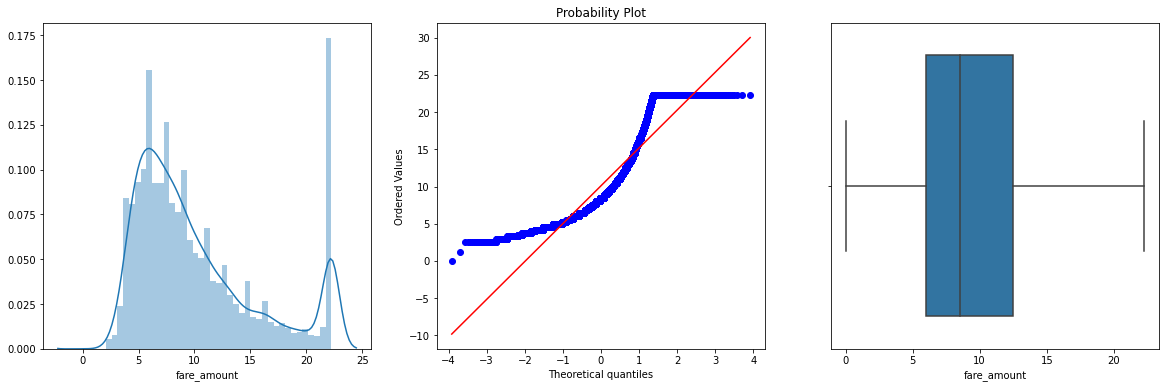

In [61]:
outlier_check_graphs(train,'fare_amount')

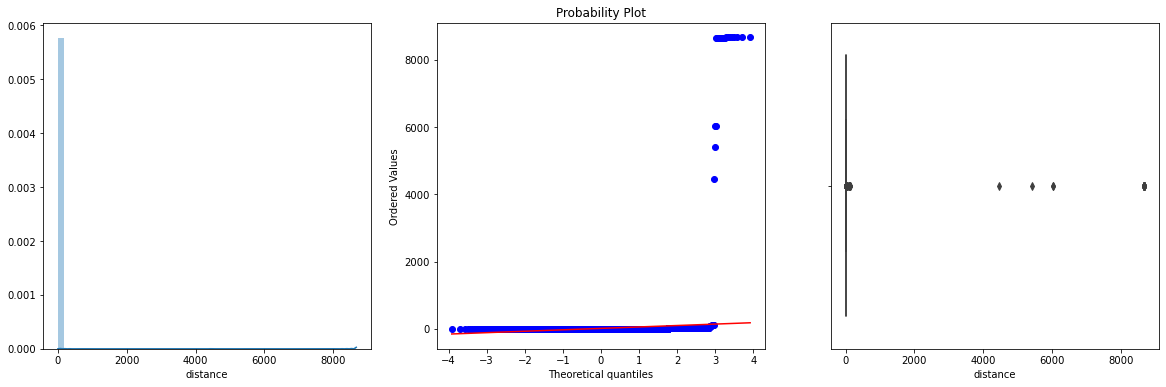

In [62]:
outlier_check_graphs(train, 'distance')

In [63]:
dist_lower, dist_upper = find_limits(train, 'distance')

In [64]:
train['distance'] = where(train['distance']> dist_upper, dist_upper,
                         where(train['distance']<dist_lower, dist_lower, train['distance']))

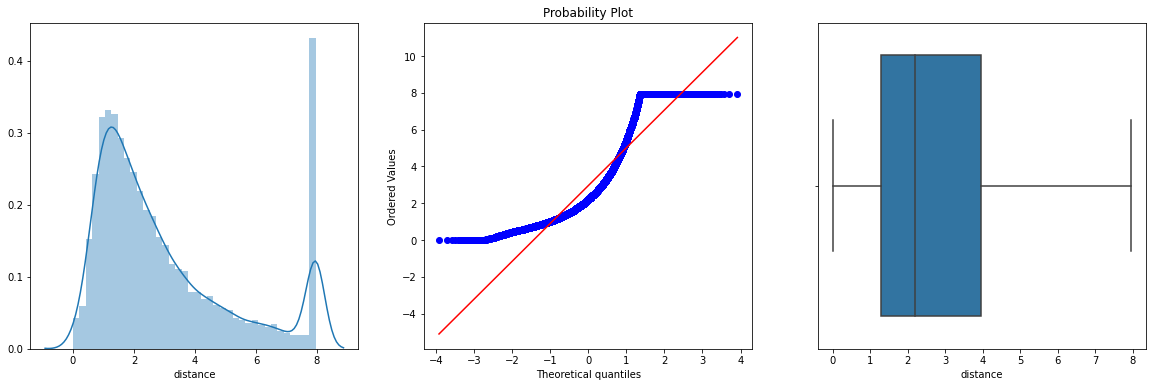

In [65]:
outlier_check_graphs(train, 'distance')

# Exploratory Data Analysis

<b>Goal of EDA</b>: Find relationships between all independant variables to dependant variable

In [70]:
train.columns

Index(['fare_amount', 'passenger_count', 'Year', 'Month', 'Day', 'Hour',
       'Minutes', 'distance'],
      dtype='object')

`Categorical Variables` --> Passenger Count, Year, Month, Day, Hour

`Numeric Variables`     --> Fare Amount, Distance

Text(0, 0.5, 'Distance')

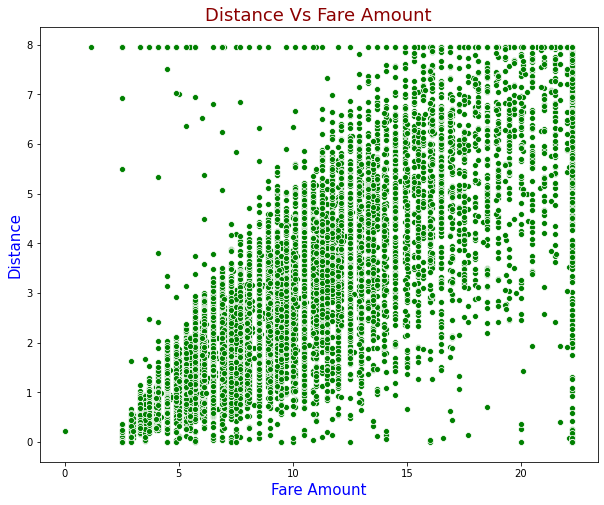

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(train.fare_amount, train.distance, color='green')

plt.title('Distance Vs Fare Amount', fontdict={
    'fontsize':18,
    'color':'darkred'
})

plt.xlabel('Fare Amount', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

plt.ylabel('Distance', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

Text(0, 0.5, 'Year')

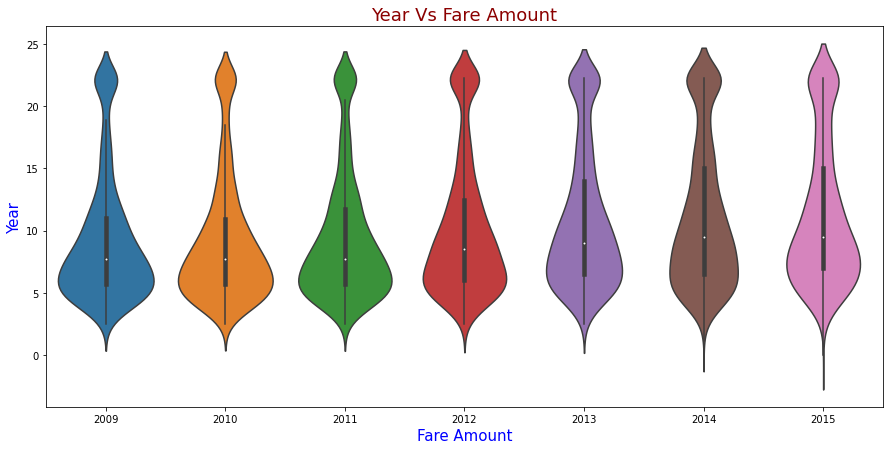

In [72]:
plt.figure(figsize=(15,7))
sns.violinplot(train.Year, train.fare_amount)

plt.title('Year Vs Fare Amount', fontdict={
    'fontsize':18,
    'color':'darkred'
})

plt.xlabel('Fare Amount', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

plt.ylabel('Year', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

Text(0, 0.5, 'Month')

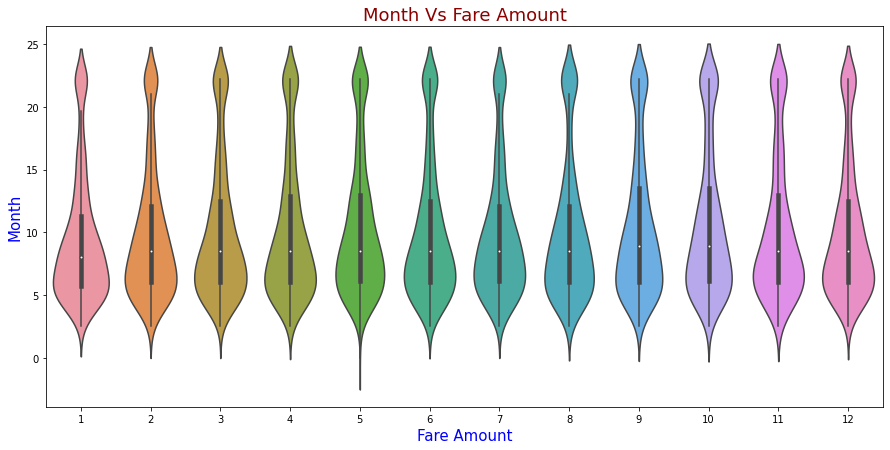

In [73]:
plt.figure(figsize=(15,7))
sns.violinplot(train.Month, train.fare_amount)

plt.title('Month Vs Fare Amount', fontdict={
    'fontsize':18,
    'color':'darkred'
})

plt.xlabel('Fare Amount', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

plt.ylabel('Month', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

Text(0, 0.5, 'Day')

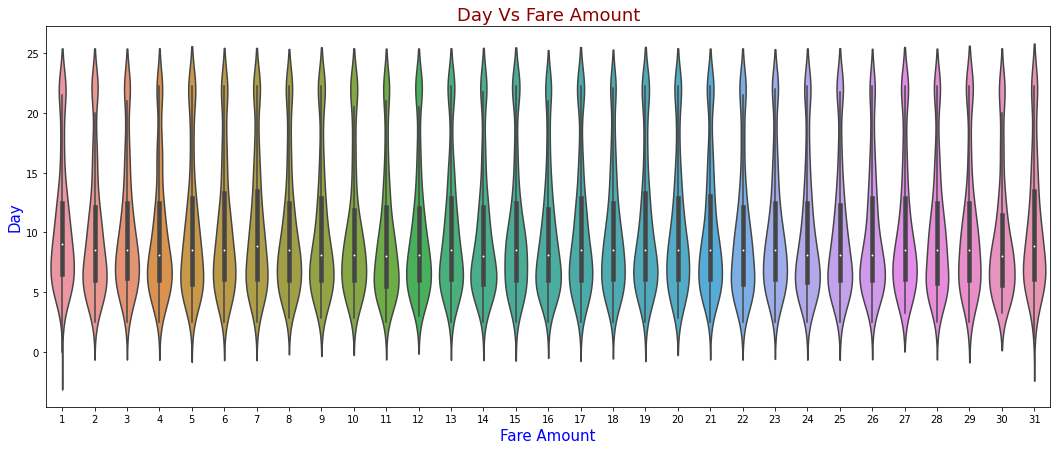

In [74]:
plt.figure(figsize=(18,7))
sns.violinplot(train.Day, train.fare_amount)

plt.title('Day Vs Fare Amount', fontdict={
    'fontsize':18,
    'color':'darkred'
})

plt.xlabel('Fare Amount', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

plt.ylabel('Day', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

Text(0, 0.5, 'Passenger Count')

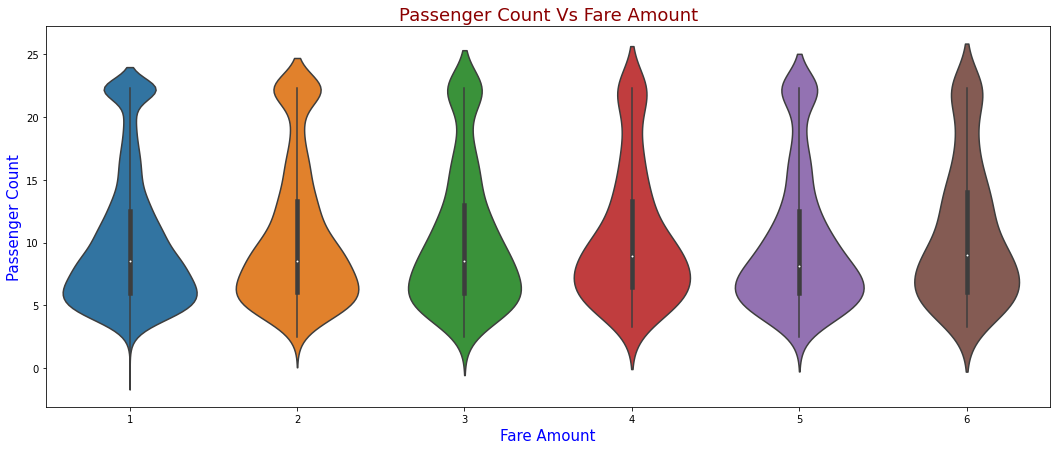

In [75]:
plt.figure(figsize=(18,7))
sns.violinplot(train.passenger_count, train.fare_amount)

plt.title('Passenger Count Vs Fare Amount', fontdict={
    'fontsize':18,
    'color':'darkred'
})

plt.xlabel('Fare Amount', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

plt.ylabel('Passenger Count', fontdict={
    'fontsize':15,
    'color':'blue',
    'fontweight':12
})

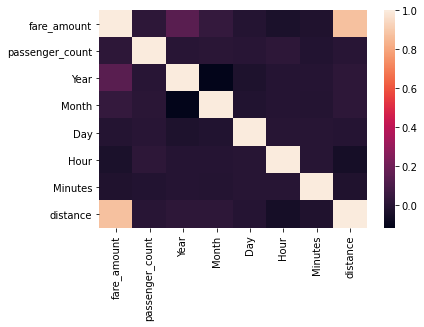

In [76]:
sns.heatmap(train.corr())

# Training the data

Clearly the problem is a regression problem. So the models that I am going to use are:

- Linear Regression
- Decision Tree Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Random Forest Regression
- Gradient Boosting Regressor

Splitting the data into training and validation sets.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = train.drop('fare_amount', axis=1)
y = train['fare_amount']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Importing Metrics

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Defining a function to calculate score

In [82]:
def calc_scores(X, y, estimator):
    print('R squared',r2_score(y, estimator.predict(X)))
    print('Mean Abosulte Error', mean_absolute_error(y, estimator.predict(X)))
    print('Mean Squared Error',mean_squared_error(y, estimator.predict(X))) 
    print(' ')

## Linear Regression

In [83]:
lr = LinearRegression()
lr.fit(X_train,y_train)
calc_scores(X_train, y_train, lr)
calc_scores(X_test, y_test, lr)

R squared 0.7833766405536071
Mean Abosulte Error 1.680862291829611
Mean Squared Error 6.407452219999623
 
R squared 0.7882139296739485
Mean Abosulte Error 1.6802718710372913
Mean Squared Error 6.481809069942169
 


## Decision Tree Regression

In [85]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
calc_scores(X_train, y_train, dtr)
calc_scores(X_test, y_test, dtr)

R squared 1.0
Mean Abosulte Error 6.323600399159468e-18
Mean Squared Error 5.71222095609066e-33
 
R squared 0.5879152413446832
Mean Abosulte Error 2.2526828478964402
Mean Squared Error 12.612041585760519
 


## Lasso Regression

In [86]:
lasso = Lasso()
lasso.fit(X_train, y_train)
calc_scores(X_train, y_train, lasso)
calc_scores(X_test, y_test, lasso)

R squared 0.7655247013527411
Mean Abosulte Error 1.8611230843159157
Mean Squared Error 6.935490598483884
 
R squared 0.7712900293230629
Mean Abosulte Error 1.8615280342645344
Mean Squared Error 6.999772742549556
 


# Support Vector Regression

In [87]:
svr = SVR()
svr.fit(X_train, y_train)
calc_scores(X_train, y_train, svr)
calc_scores(X_test, y_test, svr)

R squared -0.08667413908522548
Mean Abosulte Error 4.094607915472898
Mean Squared Error 32.14248289146707
 
R squared -0.09298753852287955
Mean Abosulte Error 4.183024313987635
Mean Squared Error 33.451381054592005
 


## Random Forest Regression

In [88]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
calc_scores(X_train, y_train, rfr)
calc_scores(X_test, y_test, rfr)

R squared 0.9697049652825863
Mean Abosulte Error 0.6244208333333334
Mean Squared Error 0.8960898212969258
 
R squared 0.7934751637671351
Mean Abosulte Error 1.6605573462783172
Mean Squared Error 6.320786606038835
 


## Gradient Boosting Regression

In [89]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
calc_scores(X_train, y_train, gbr)
calc_scores(X_test, y_test, gbr)

R squared 0.8209903914600714
Mean Abosulte Error 1.5252024781966937
Mean Squared Error 5.294883786179451
 
R squared 0.8093483217867523
Mean Abosulte Error 1.570763375234566
Mean Squared Error 5.834981380691471
 


Obviously, the best models from above are: `Gradient Boosting`, `Random Forest`

# Predicting test values using `Random Forest Regressor` and `Gradient Boosting Regression`

In [95]:
rfr = RandomForestRegressor()

In [96]:
rfr.fit(X,y)

RandomForestRegressor()

In [97]:
rfr.score(X,y)

0.9703683080975973

In [99]:
test['fare_amount'] = 0

In [104]:
test['fare_amount'] = rfr.predict(test.drop('fare_amount', axis=1))

In [107]:
gbr = GradientBoostingRegressor()

In [108]:
gbr.fit(X,y)

GradientBoostingRegressor()

In [109]:
gbr.score(X,y)

0.8190181122957013

In [114]:
test1 = test.drop('fare_amount', axis=1)

In [116]:
test1['fare_amount'] = gbr.predict(test.drop('fare_amount', axis=1))

### writing the predictions to a new file

In [119]:
test.to_csv('final_predictions_python.csv')